In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercor-ai-detection/train.csv
/kaggle/input/mercor-ai-detection/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/mercor-ai-detection/train.csv")
df.head()

,id,topic,answer,is_cheating
0,form_r_d5TpupthGXvfy58LDIbkqp,A girl wakes from a dream and she is not sure ...,"My eyes flew open, and the air around me feels...",1
1,form_r_AAABmK2rZBBbtfdHxzhBY4C4,A journalistic review piece about the top 6 ai...,Robot Butlers in the year of 2025. What are th...,0
2,form_r_Cz6IJIWUj1B7pdyO6zPhGF,The influence of fictional universities in cam...,"In recent years, apparel featuring the names a...",1
3,form_r_AAABmKyCfdO6NLv8eqBPCYD_,Why do girls love horses,"The moment before I hit the dirt, I thought we...",0
4,form_r_WS8I1NJpwvIcFL3Xv0Qhuc,"Every year, a remote mountain town elects a ne...","In the valley of Eldermist, were the mountains...",1


In [3]:
df.shape

(269, 4)

In [4]:
# Display all columns
pd.set_option('display.max_colwidth', None)

# Random few samples to inspect text structure
df.sample(5, random_state=42)


,id,topic,answer,is_cheating
30,form_r_AAABmMMM-3l2k5OJcgBO152T,Marketing in the AI world,Marketing in the AI world is a very hot topic in todays time as every traditional method of marketing is getting reshaped according to the AI trends that we are seeing nowadays. From creating social media post to writing content for a particular project AI has help the marketers to create a new way of putting up things in front of the target audience. Digital Marketing has advanced 10x after the introduction of AI to we can single handedly create campaign extract data create KPI's and do a deep down analysis of how to reach the target audience. But the only disadvantage that we are currently facing with AI is the accuracy of data and information that is available on these platform if each and every information is correct and verified from the source then AI is the best thing that has happened to the Marketing world.,0
116,form_r_AeSZ88MED4djIBoclFA4VH,How film soundtracks drove candy sales in the 1990s,"In the vibrant landscape of 1990s pop culture, film soundtracks and candy brands formed an unlikely but highly successful partnership. Major movie studios recognized that the music from blockbuster films—think “The Bodyguard” or “Space Jam”—could be leveraged beyond the box office. By integrating candy brands into both the films themselves and the surrounding soundtrack marketing, studios created immersive experiences that resonated with younger audiences. Product placements, such as Reese’s Pieces in “E.T.” or M&M’s in “Forrest Gump,” were reinforced by catchy soundtrack singles that dominated radio airwaves and MTV alike. As fans flocked to stores for the latest cassette or CD, strategically positioned candy displays mirrored the excitement of the moviegoing experience. This synergy transformed soundtracks into a marketing vehicle, driving spontaneous candy purchases and forging emotional connections bitween sweet treats and cinematic moments—a testament to the power of cross-promotion in the era’s marketing landscape.",1
79,form_r_TwbHITgMyoaWc0DQkhI29p,A museum guard watches the paintings move after closing time but can never catch them in the act.,"Every night, after the last visitor’s footsteps faded and the echo of closing doors settled into silence, Harold began his ronuds. The museum was a cathedral of stillness, yet Harold could never shake the feeling that he was not alone. Sometimes, in the periphery of his vision, he’d catch a flicker—a brushstroke shifting, a figure turning ever so slightly. He’d whirl around, flashlight beam trembling, but the galleries remained immaculate and motionless. The girl with the pearl earring always looked a bit more amusid, and the ships in the seascape seemed to ride rougher waves. Once, he was sure he heard a laugh—a low, conspiratorial giggle from the Renaissance wing. But when he hurried in, the only sound was his own breath. Each morning, the paintings sat as they always had, serene and static. Yet Harold knew, as surely as he knew his own name, that when the lights dimmed, the art remembered how to move.",1
127,form_r_AAABmI7MjOEK-tlH7VZBuLs_,Within every piece of evil is a piece of humanity,"When a soldier is sent to war, He isn't controlled by his own thoughts, his own convictions, and his own values. But rather, by the orders from the hierarchy.\n\nHe has no voice, he has no choice. His heart might scream over an order given to him by the hierarchy, but he has no choice. Can you just imagine what this means!\n\nSomeone is being removed from his freedom to think, to act, and to defend his/her own values. usually, beneath those orders, is a silent voice that screams, a silent voice that cries. That is the human part of his being.\n\nBut what can he do?",0
190,form_r_a5OgcvBroE3H37yVkBe5kK,A pilot crash-lands on an uncharted island inhabited by people who think it’s 1923.,"The jungle swallowed the wreckage of Daniel’s plane, its twisted metal groaning in protest as vines claimed it. Stagger

In [5]:
# Missing values
print(df.isna().sum())

# Length distributions
df['answer_length'] = df['answer'].apply(lambda x: len(str(x)))
df['topic_length'] = df['topic'].apply(lambda x: len(str(x)))

df[['answer_length', 'topic_length']].describe()


id             0
topic          0
answer         0
is_cheating    0
dtype: int64


,answer_length,topic_length
count,269.000000,269.000000
mean,1053.052045,88.289963
std,676.411116,128.082841
min,142.000000,7.000000
25%,803.000000,43.000000
50%,983.000000,57.000000
75%,1084.000000,93.000000
max,6306.000000,1526.000000


In [6]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)             # remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)      # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()        # normalize spaces
    return text

df['topic_clean'] = df['topic'].apply(clean_text)
df['answer_clean'] = df['answer'].apply(clean_text)


In [7]:
df['text'] = df['topic_clean'] + " " + df['answer_clean']

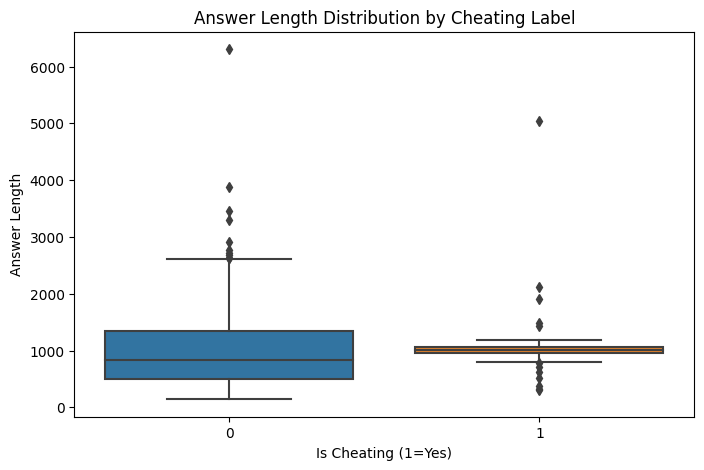

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


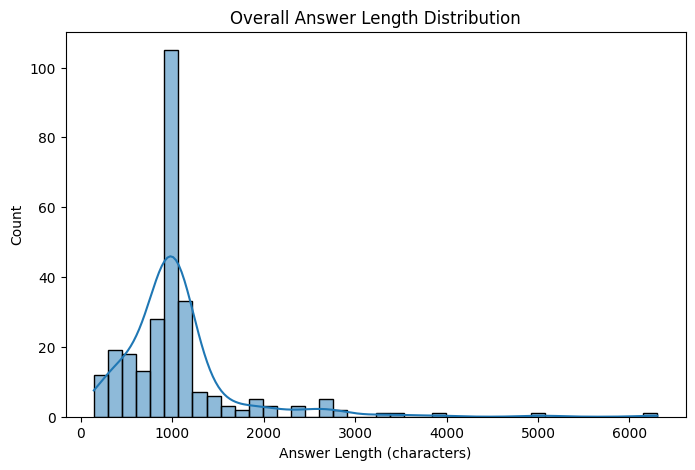

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot answer lengths by class
plt.figure(figsize=(8,5))
sns.boxplot(x='is_cheating', y='answer_length', data=df)
plt.title("Answer Length Distribution by Cheating Label")
plt.xlabel("Is Cheating (1=Yes)")
plt.ylabel("Answer Length")
plt.show()

# Histogram for overall answer length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['answer_length'], bins=40, kde=True)
plt.title("Overall Answer Length Distribution")
plt.xlabel("Answer Length (characters)")
plt.show()


In [9]:
topic_counts = df['topic'].value_counts()
print("Unique topics:", len(topic_counts))
print(topic_counts.head(10))

# Check cheating ratios per topic
topic_ratio = df.groupby('topic')['is_cheating'].mean().sort_values(ascending=False)
print(topic_ratio.head(10))
print(topic_ratio.tail(10))


Unique topics: 268
topic
Fiction                                                                                                   2
The Unlikely Comeback of Analog Billboards in Smart Cities                                                1
Social Media - Connect Us                                                                                 1
The influence of weather on famous military blunders                                                      1
Secret Menus: The Quiet Weapon of Fast Food Chains                                                        1
A postman working the midnight shift starts delivering letters for people who died years ago.             1
Travel blog content creation                                                                              1
A child stumbles upon a locked garden where time passes differently for every plant.                      1
The social lives of octopuses: intelligence in invertebrates                                              1
Hav

In [10]:
df.columns

Index(['id', 'topic', 'answer', 'is_cheating', 'answer_length', 'topic_length',
       'topic_clean', 'answer_clean', 'text'],
      dtype='object')

In [11]:
import re
import numpy as np
import pandas as pd
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_and_vectorize(
    df,
    vectorizer=None,
    fit_vectorizer=False,
    is_train=True,
    target_col="is_cheating",
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english"
):
    """
    Preprocesses dataframe (train or test) and returns TF-IDF features concatenated
    with numeric features. Also returns target (if present) and ids for test data.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe containing 'topic' and 'answer'. For train should also contain target_col.
    vectorizer : TfidfVectorizer or None
        If provided and fit_vectorizer=False, will be used to transform text.
        If provided and fit_vectorizer=True, it will be fit on this df.
        If None and fit_vectorizer=True, a new TfidfVectorizer will be created with defaults below.
    fit_vectorizer : bool
        If True, fit the TF-IDF vectorizer on this dataframe's text (use for training).
        If False, transform using the provided (already-fitted) vectorizer (use for test/inference).
    is_train : bool
        True for training data (returns X, y, vectorizer). False for test data (returns X, ids, vectorizer).
    target_col : str
        Column name for the target (default 'is_cheating').
    max_features, ngram_range, stop_words : passed to TfidfVectorizer if created/fitted here.

    Returns
    -------
    If is_train == True:
        X_final : scipy.sparse.csr_matrix
            Sparse matrix of TF-IDF features concatenated with numeric features [answer_length, topic_length].
        y : np.ndarray
            Target values (dtype=int).
        vectorizer : TfidfVectorizer
            The fitted vectorizer (useful for inference).
    If is_train == False:
        X_final : scipy.sparse.csr_matrix
            Sparse matrix ready for model prediction.
        ids : pd.Series
            The id column for submission mapping.
        vectorizer : TfidfVectorizer
            The fitted vectorizer (must be provided or will be error).
    """

    # Work on a copy and reset index to ensure alignment
    df = df.copy().reset_index(drop=True)

    # Basic cleaning helper (consistent with previous pipeline)
    def clean_text(text):
        text = "" if pd.isna(text) else str(text)
        text = text.lower()
        text = re.sub(r"[^a-z0-9\s]", " ", text)   # keep alphanumerics and whitespace
        text = re.sub(r"\s+", " ", text).strip()
        return text

    # Create cleaned fields and combined text
    df["topic_clean"] = df["topic"].apply(clean_text)
    df["answer_clean"] = df["answer"].apply(clean_text)
    df["text"] = (df["topic_clean"] + " " + df["answer_clean"]).str.strip()

    # Numeric features (word counts)
    df["topic_length"] = df["topic_clean"].apply(lambda x: len(x.split()))
    df["answer_length"] = df["answer_clean"].apply(lambda x: len(x.split()))

    # Prepare vectorizer
    if fit_vectorizer:
        # create a default vectorizer if none provided
        if vectorizer is None:
            vectorizer = TfidfVectorizer(max_features=max_features,
                                         ngram_range=ngram_range,
                                         stop_words=stop_words)
        # fit & transform
        X_tfidf = vectorizer.fit_transform(df["text"].values)
    else:
        # for inference we must have a fitted vectorizer
        if vectorizer is None:
            raise ValueError("A fitted vectorizer must be provided when fit_vectorizer=False")
        X_tfidf = vectorizer.transform(df["text"].values)

    # Numeric array (ensure numeric dtype)
    numeric_arr = np.asarray(df[["answer_length", "topic_length"]].astype(float).values)

    # Combine sparse TF-IDF + dense numeric features into sparse matrix
    X_final = hstack([X_tfidf, numeric_arr], format="csr")
    X_final = csr_matrix(X_final)  # ensure CSR

    if is_train:
        if target_col not in df.columns:
            raise ValueError(f"Training mode requested but target column '{target_col}' not found in dataframe.")
        y = df[target_col].astype(int).values
        return X_final, y, vectorizer
    else:
        if "id" not in df.columns:
            raise ValueError("Test mode requested but 'id' column is missing from dataframe.")
        ids = df["id"]
        return X_final, ids, vectorizer

In [12]:
X_train_final, y_train, vectorizer = preprocess_and_vectorize(df, fit_vectorizer=True)

In [13]:
test = pd.read_csv("/kaggle/input/mercor-ai-detection/test.csv")
test.columns

Index(['id', 'topic', 'answer'], dtype='object')

In [14]:
X_sub_final, test_ids, _ = preprocess_and_vectorize(test, vectorizer=vectorizer, fit_vectorizer=False, is_train=False)

In [15]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_final, y_train,
    test_size=0.2,  # 80/20 split
    random_state=42,
    stratify=y_train  # keeps class balance
)

In [16]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

model = lgb.LGBMClassifier(
    objective="binary",
    learning_rate=0.05,
    n_estimators=300,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric="binary_logloss",
    callbacks=[lgb.early_stopping(stopping_rounds=30), lgb.log_evaluation(10)]
)


[LightGBM] [Info] Number of positive: 117, number of negative: 98
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 215, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544186 -> initscore=0.177206
[LightGBM] [Info] Start training from score 0.177206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=300,
               n_jobs=-1, objective='binary', random_state=42, subsample=0.8)

In [17]:
from sklearn.metrics import roc_auc_score

y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Accuracy: 0.8148148148148148
ROC-AUC: 0.8916666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.81      0.87      0.84        30

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



In [18]:
# retrain on full training data
final_model = lgb.LGBMClassifier(**model.get_params())
final_model.fit(X_train_final, y_train)


[LightGBM] [Info] Number of positive: 147, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 269, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546468 -> initscore=0.186412
[LightGBM] [Info] Start training from score 0.186412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=300,
               n_jobs=-1, objective='binary', random_state=42, subsample=0.8)

In [19]:
test_preds = final_model.predict(X_sub_final)

submission = pd.DataFrame({
    "id": test_ids,
    "is_cheating": test_preds
})
submission.to_csv("submission.csv", index=False)